# Jak organismy detekují změny

Živé organismy musí reagovat na změny v prostředí, ve kterém žijí. V naprosté většině případů je pro ně přirozené reagovat na absolutní změny, než na změny relativní. Například při reakci na světlo je poměrně velký rozdíl, pokud do místnosti osvětlené svíčkami přidáme svíčku další. Pokud původně místnost osvětlovala svíčka jediná a přidali jsme druhou, je to významná změna. Pokud svíček však bylo padesát a přidáme padesátou první, není to pouhým okem nijak patrné. A pokud svíčku rozsvítíme za jasného dne (například kalíšek na hřbitově), není často plamen ani vidět. 

Popsaný fenomén je možno pozorovat u různých živých organismů a v různých měřítcích. Psychologové takové vnímání smysly znají a označují ho pojmem [Weberův-Fechnerův zákon](https://cs.wikipedia.org/wiki/Weber%C5%AFv%E2%80%93Fechner%C5%AFv_z%C3%A1kon). Někdy se tento zákon vyjadřuje vyjadřuje tak, že změna pozorovatelná smysly je úměrná intezitě podnětu. Například u padesátigramového závaží je možné rozlišit potěžkáním v ruce, jestli není o pět gramů těžší, u kilogramového závaží to již možné není. Abychom vnímali stejně intenzivně změnu hmotnosti, musela by se hmotnost kilogramového závaží změnit o sto gramů. Poté bude vždy změna hmotnosti deset procent aktuální hmotnosti a to je vnímatelné lidskými smysly. Matematickým důsledkem výše popsaného zákona je, že pokud podněty rostou geometrickou řadou, je každá taková změna vnímána stejně intenzivně. 

Schopnost detekovat  změny vstupního signálu ne podle absolutní velikosti podnětu, ale podle velikosti relativní, se nazývá *fold change detection*, *FCD*.
V publikaci Adler (2018) je několik principů, jak je možné vlastnosti FCD dosáhnout, včetně detailnějšího popisu vybraných konkrétních příkladů a popisu uskutečněných pozorování. My se zde zaměříme na jednu z cest k FCD, na I1 FFl motiv.

## I1 FFL a schopnost detekce změn

<img src="//be150.caltech.edu/2020/content/_images/i1-ffl.png" alt="drawing" width="200"/> (Obrázek z [http://be150.caltech.edu/2020/content/lessons/05_ffls.html](http://be150.caltech.edu/2020/content/lessons/05_ffls.html))

S I1 FFL obvodem (motivem) jsme se setkali při studiu [záporné zpětné vazby v růstových modelech](http://user.mendelu.cz/marik/aromamath/Zaporna_zpetna_vazba_v_rustovych_modelech.html). V těchto modelech I1 FFL motiv sloužil k urychlení syntézy potřebného proteinu tím, že současně s cílovým proteinem byl syntetizován i inhibitor, který rychlou produkci při dosažení určité koncentrace inhibitoru zastavil. Předpokláddali jsme jednoduchý scénář, kdy přítomnost inhibitoru sníží produkci. Použijeme zde podobný model, ale matematicky složitější. Nebudeme předpokládat skokovou změnu, ale spojitou. Přesněji, budeme používat následující předpoklady.

* Látka $X$ je podnět, který spustí produkci látek $Y$ a $Z$.
* Látka $Y$ je inhibitorem pro $Z$ a zpomaluje jeho produkci. 
* Obě látky $Y$ a $Z$ se rozkládají rychlostí úměrnou jejich koncentraci.

Matematickým modelem je následující soustava rovnic, viz Adler (2018).
$$\begin{aligned}
\frac{\mathrm dy}{\mathrm dt}&=ax-by\cr
\frac{\mathrm dz}{\mathrm dt}&=\alpha \frac {x}{y}-\beta z
\end{aligned} \tag{1}$$
V této soustavě proměnné $y$ a $z$ vyjadřují koncentrace odpovídajících látek a podpora či utlumení reakce je vyjádřena přímou nebo nepřímou úměrností. Tuto soustavu není těžké vyřešit analyticky, protože pro známý časový průběh vstupního signálu $x(t)$ je první rovnice lineární rovnicí pro neznámou funkci $y(t)$ a poté je poslední rovnice opět lineární rovnicí pro neznámou $z(t)$. Nám však bude stačit numerická simulace ukazující, že popsaný systém chemických reakcí má takové vlastnosti, že organismus jakým může být i jednoduchá buňka bakterie *E. coli* dokáže reagovat na podněty podle jejich relativní velikosti.

## Nondimenzionalizace a numerický model

V systému (1) figuruje vstupní signál $x$, čtyři parametry ($a$, $b$, $\alpha$ a $\beta$) a tři proměnné ($y$, $z$, $t$). Vhodnou změnou jednotek (podrobně je rozepsáno například v Goentoro (2009)) je možné dosáhnout toho, že systém obsahuje jenom jeden bezrozměrný parametr a soustava má tvar
$$\begin{aligned}
\frac{\mathrm dy}{\mathrm dt}&=x-y\cr
\frac 1\rho \frac{\mathrm dz}{\mathrm dt}&=\frac {x}{y}-z.
\end{aligned}\tag{2} $$
Bez komplikovaného matematického rozboru je možné stejného zjednodušení z (1) na (2) dosáhnout i následující úvahou.

* Budeme volit jednotku veličiny $x$ tak, aby na začátku byla hodnota podnětu rovna jedné. Tedy velikost $x$ budeme měřit v násobcích počátečního stavu.
* Budeme volit jednotku veličiny $y$ tak, aby na začátku pro $x=1$ byla hodnota stacionárního stavu rovna jedné. Tedy velikost $y$ budeme měřit v násobcích stacionární hodnoty při počátečním stavu podnětu $x$. To znamená, že numericky budou hodnoty konstant $a$ a $b$ v soustavě (1) stejné. Pravá strana první rovnice tedy bude násobkem rozdílu $x-y$ a ve stacionárním stavu vždy platí $x=y$.
* Budeme volit jednotku času tak, aby numericky při počátečním podnětu byla rychlost produkce rovna jedné. To znamená, že čas budeme měřit tak, aby rychlost vycházela v násobcích počáteční rychlosti produkce. Tím dosáhneme toho, že společná hodnota konstant $a$ a $b$ v soustavě (1) je rovna jedné.
* Budeme volit jednotku veličiny $z$ tak, aby ve stacionárním stavu kdy platí $x=y$ byla hodnota $z$ rovna jedné. V každém okamžiku, nezávisle na hodnotě $x$, tedy bude systém konvergovat ke stacionárnímu stavu $z=1$. Matematicky to znamená, že konstanty $\alpha$ a $\beta$ budou stejné. Jejich společnou hodnotu označíme $\rho$.

Takto zjednodušený systém si namodelujeme.

In [ ]:
import matplotlib.pyplot as plt   # Knihovna pro statické grafy. Grafy budeme kreslit sem do zápisníku.
%matplotlib inline               

import numpy                      # Knihovna pro numerické výpočty.
from scipy.integrate import solve_ivp  # Knihovna pro řešení diferenciálních rovnic.


Nadefinujeme funkci modelující změny podnětu geometrickou řadou, tedy vždy například na dvojnásobek předchozí úrovně. Poté naformulujeme model a vyřešíme pomocí funkce pro řešení diferenciálních rovnic. Protože data budou nespojitá (vstupní signál se mění skokem), natavíme maximální hondnotu časového kroku na malou velikost. Bez toho by se totiž mohlo stát, že algoritmus se "ukolébá" v pasážích, kde se nic neděje a poté nestihe zareagovat na prudkou změnu. Přesněji, v případě použití metody s proměnnou délkou kroku dojde k prodloužení tohoto kroku a toto prodloužení by mohlo být nežádoucí pro modelování dynamiky v okamžiku změny v $x$.

In [ ]:
def podnet(t):
    i=2                        # Násobek s jakým roste podnět x. Při hodnotě menší než jedna podnět klesá.
    t0,t1,t2,t3 = 1,6,12,16    # Časy ve kterých dojde ke změně intenzity podnětu.
    skoky = [t<t0, (t>=t0)&(t<t1), (t>=t1)&(t<t2), (t>=t2)&(t<t3)]   # Intervaly, na kterých je podnět konstantní. Intervaly mezi skoky.
    hodnoty = [1, i, i**2, i**3, i**4]  # Hodnota podnětu po každém skoku. Volíme geometrickou řadu.
    return (numpy.piecewise(t,skoky,hodnoty))   # Výsledkem je po částech konstantní funkce s definovanými skoky a funkčními hodnotami.

def model(t, promenne):   # Definice interakce mezi proteiny
    x = podnet(t)         # Intenzita podnetu v daném čase
    y, z = promenne       # Pro pohodlí rozbalíme pole vstupních dat na proměnné pojmenované stejně jako v textu.
    rho = 20              # Jediný bezrozměrný parametr https://doi.org/10.1016/j.coisb.2017.12.005
    return [x - y, rho*(x/ y - z)]  # Výstupem jsou pravé strany systému

tmin, tmax = 0, 20                   # Meze pro časový interval
t = numpy.linspace (tmin,tmax,1000)  # Časový interval
pocatek = [1,1]     # Počáteční podmínka, pro jednoduchost ve stacionárním bodě odpovídajícím počáteční hodnotě podnětu
reseni = solve_ivp(model, [tmin, tmax], pocatek, dense_output=True, max_step=0.01 )   # Řešení počáteční úlohy


Pro prezentaci dat si průběh vstupního signálu a průběh řešení uložíme do proměnných a vykreslíme graficky. Grafy mají stejnou časovou osu a jsou pod sebou. Díky tomu vidíme pěkně, že v místech kde intenzita podnětu roste na svůj násobek je vždy peak veličiny $z$. Tyto peaky jsou všechny stejné přesto, že schodky v proměnné $x$ stejné nejsou. Přesněji, není stejná velikost schodku. Co však je stejné je nárůst schodku na dvojnásobek. Je tedy stejná relativní změna $x$.

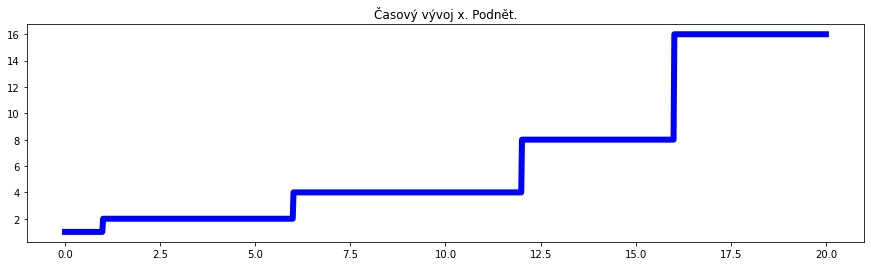

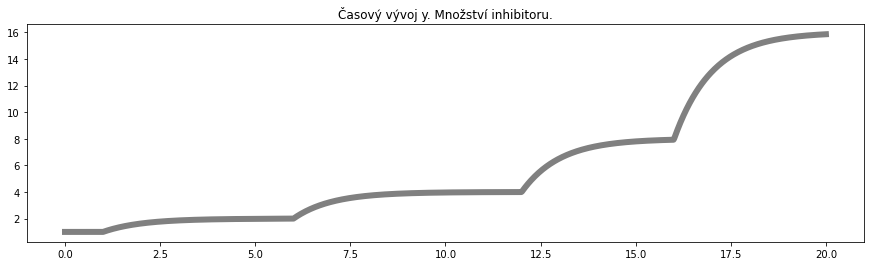

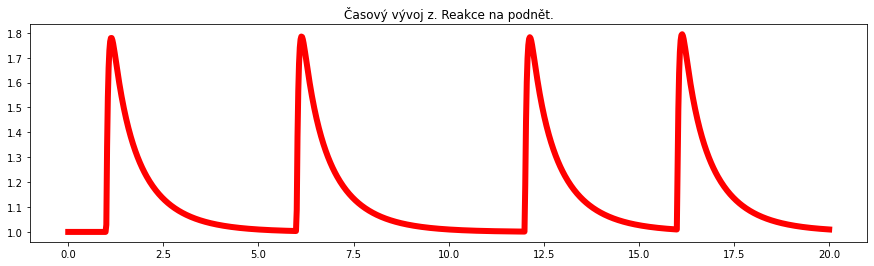

In [ ]:
y, z = reseni.sol(t)              # Řešení soustavy rovnic.
x = podnet(t)                     # Časový průběh intenzity podnětu

    # Budme kreslit tři obrázky. Jejich tvorbu uděláme v cyklu, ve kterém jenom předáme data, barvu a text do nadpisu
for (data, jmeno, barva) in ((x,"x. Podnět.","blue"), (y,"y. Množství inhibitoru.","gray"), (z,"z. Reakce na podnět.","red")):
    plt.figure(figsize=(15,4))             # Inicializace obrázku. Samostatný obrázek pro každý graf
    plt.plot(t, data, color=barva, lw=6)   # Vykreslení grafu zvolenou barvou a tlustou čarou (linewdith 6)
    plt.title("Časový vývoj %s"%jmeno)     # Nadpis

## Návrh na další aktivitu

V publikaci Adler(2018) jsou i další návrhy, jak zrealizovat FCD chování. Najděte je a vyzkoušejte si zde uvedený skript předělat na tyto modely.

## Literatura

1. Miri Adler, Uri Alon: Fold-change detection in biological systems, Current Opinion in Systems Biology
Volume 8, April 2018, Pages 81-89. Online [https://doi.org/10.1016/j.coisb.2017.12.005](https://doi.org/10.1016/j.coisb.2017.12.005)  (7.4.2021)
1. Lea Goentoro, Oren Shova, Marc W. Kirschner, Uri Alon: The Incoherent Feedforward Loop Can Provide Fold-Change Detection in Gene Regulation, Molecular Cell
Volume 36, Issue 5, 11 December 2009, Pages 894-899. Online [https://doi.org/10.1016/j.molcel.2009.11.018](https://doi.org/10.1016/j.molcel.2009.11.018) (8.4.2021)